In [86]:
import pandas as pd
import pingouin as pg
from scipy.stats import levene
import scipy.stats as ss
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pictures = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/analytics_practice/statistics/data/5_task_1.csv')

In [20]:
a = pictures[pictures.group == 'A'].events
b = pictures[pictures.group == 'B'].events
c = pictures[pictures.group == 'C'].events

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [25]:
p = levene(a, b, c)
p

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [26]:
??pg.homoscedasticity

AssertionError: 

In [31]:
a_normality = ss.normaltest(a)
b_normality = ss.normaltest(b)
c_normality = ss.normaltest(c)

print(a_normality)
print(b_normality)
print(c_normality)


NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


In [32]:
a_shapiro = ss.shapiro(a)
b_shapiro = ss.shapiro(b)
c_shapiro = ss.shapiro(c)

print(a_shapiro)
print(b_shapiro)
print(c_shapiro)

ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)
ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)
ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


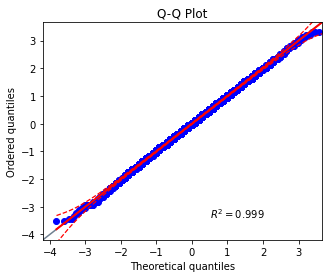

In [52]:
pg.qqplot(a)

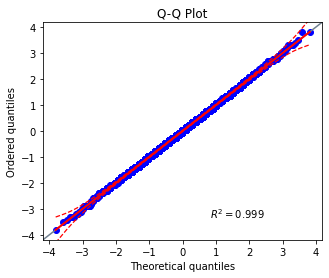

In [35]:
pg.qqplot(b)

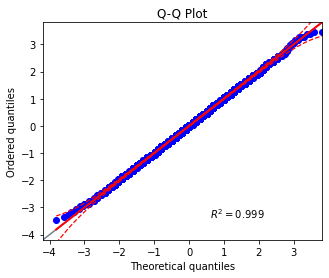

In [36]:
pg.qqplot(c)

In [53]:
# Провести ANOVA тест
ss.f_oneway(a, b, c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [126]:
pictures

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [71]:
# Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
sm.stats.multicomp.pairwise_tukeyhsd(pictures.events, pictures.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [84]:
pics_pivot = pd.pivot_table(data=pictures, columns='group', values='events')

In [ ]:
pd.pivot_table

In [85]:
pics_pivot

group,A,B,C
events,29.5796,37.6136,27.4703


In [76]:
pictures

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [87]:
buttons = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/analytics_practice/statistics/data/5_task_2.csv')

In [ ]:
test = buttons[buttons.group == 'test'].events

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


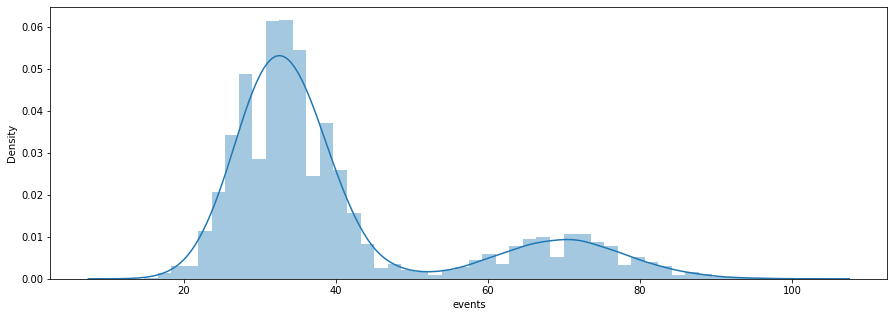

In [113]:
plt.figure(figsize=(15, 5))
sns.distplot(buttons[buttons.group == 'test'].events)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


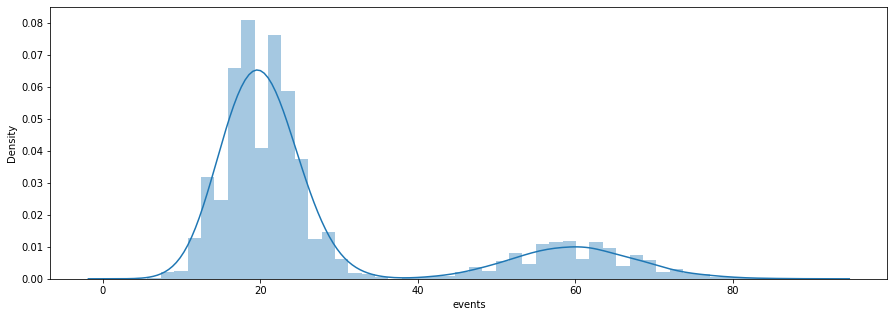

In [112]:
plt.figure(figsize=(15, 5))
sns.distplot(buttons[buttons.group == 'control'].events)

In [116]:
# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 
buttons.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [115]:
buttons

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [121]:
# Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, 
# чтобы понять между какими группами есть статистически значимые различия.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'events ~ segment + group + segment:group'
model = ols(formula, data=buttons).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [124]:
buttons['combination'] = buttons.group + "\\" + buttons.segment

In [134]:
sm.stats.multicomp.pairwise_tukeyhsd(buttons.events, buttons.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control,test,12.389,0.001,12.185,12.593,True


In [133]:
sm.stats.multicomp.pairwise_tukeyhsd(buttons.events, buttons.segment).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-38.4259,0.001,-38.5583,-38.2935,True


In [132]:
sm.stats.multicomp.pairwise_tukeyhsd(buttons.events, buttons.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control\high,control\low,-39.9392,0.001,-40.1073,-39.7711,True
control\high,test\high,9.9677,0.001,9.7551,10.1803,True
control\high,test\low,-26.9449,0.001,-27.113,-26.7768,True
control\low,test\high,49.9069,0.001,49.7388,50.075,True
control\low,test\low,12.9944,0.001,12.888,13.1007,True
test\high,test\low,-36.9126,0.001,-37.0807,-36.7445,True


In [130]:
buttons

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high
...,...,...,...,...,...
99995,60695,control,low,15.0,control\low
99996,5934,control,low,16.0,control\low
99997,30046,control,low,22.0,control\low
99998,26474,control,low,21.0,control\low


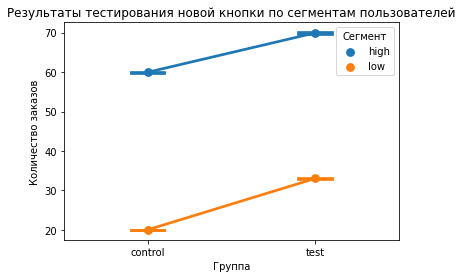

In [144]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = buttons, capsize = .2, order=['control', 'test'])
plt.title('Результаты тестирования новой кнопки по сегментам пользователей')
plt.xlabel('Группа')
plt.ylabel('Количество заказов')
plt.legend(title = 'Сегмент')

In [146]:
buttons

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high
...,...,...,...,...,...
99995,60695,control,low,15.0,control\low
99996,5934,control,low,16.0,control\low
99997,30046,control,low,22.0,control\low
99998,26474,control,low,21.0,control\low
